## Getting started

Either:

- Click [this link](https://colab.research.google.com/github/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/Search_problems.ipynb) to open this notebook in Google colab.  You'll need to sign in with a Google account before you can run it.  When you do, hit `Ctrl+F9` to check it all runs.

or

- Download it to your local computer using `git clone https://github.com/engmaths/SEMT10002_2024` or just use `git pull` to refresh if you've done this already.
- Navigate to the subfolder `consolidation_exercises/week_17_search/` and open the notebook `Search_problems.ipynb`.  For example, in Visual Studio Code, use `Ctrl+K Ctrl+O` to open a folder and select the folder just mentioned.  Then you can open the notebook file by clicking on it in the left hand explorer sidebar.

<h1> Search Algorithms </h1>

In last week's class, we saw how to implement some abstract data types (e.g. stacks and trees). Many real-world problems can be solved by first describing them as a tree (or graph) and then searching for a path between the nodes on the tree. In today's consolidation exercise, look at implementing and using algorithms for searching through a data structure. Before we do that, we'll have a quick refresher on classes as we implement two additional data structures that we'll need. 

<h2> Queues</h2>

Last week, we were introduced to the stack,  a "Last-in, first out" data structure. We saw how we can use a stack to solve some simple tasks and were introduced to the simple definition of a class for representing a stack. 

In [1]:

class Stack:

	def __init__(self):
		self.stack = []

	def push(self, item):
		self.stack.append(item)

	def pop(self):
		if len(self.stack) < 1:
			return None
		return self.stack.pop()

	def is_empty(self):
		return len(self.stack)==0

def test_stack():

	print("Running tests")
	stack = Stack()
	stack.push(1)
	stack.push(2)
	stack.push(3)
	assert(stack.is_empty()==False)
	assert(stack.pop()==3)
	assert(stack.pop()==2)
	assert(stack.pop()==1)
	assert(stack.is_empty()==True)
	print("Tests complete")

test_stack()

Running tests
Tests complete


A *queue* is very similar to a stack- it's a collection of elements, with push and pop operations. The only difference is that rather than using the principle of Last-In, First-Out, a queue uses First-In, First-Out (FIFO). We can implement this in Python with almost the same code as for the stack- the only thing we need to change is how the pop operation works. Rather than popping the last element, we need to pop the first element. Fortunately, Python's built in list pop method can take an argument, specifying which index should be popped. If we call, my_list.pop(0), it'll remove and return the first element of the list for us. 

**Exercise**: Complete the code below to implement a queue class. Test your code is correct using the provided test functions.

In [73]:
class Queue:

    def __init__(self):
        self.queue = []

    def push(self, item):
        #Your code goes here
        pass

    def pop(self):
        #Your code goes here
        pass

    def is_empty(self):
        return len(self.queue)==0

def test_queue():

    queue = Queue()
    queue.push(1)
    queue.push(2)
    queue.push(3)
    assert queue.is_empty()==False
    assert queue.pop()==1
    assert queue.pop()==2
    assert queue.pop()==3
    assert queue.is_empty()==True

test_queue()

AssertionError: 

<h2> Graphs </h2>

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/graph.png?raw=true" width="425"/> 

The final abstract data structure we'll look at today is a graph. A graph $G = (V, E)$ consists of a set of vertices, $V$, connected by a set of edges $E$. Each vertex in a graph is associated with a particular value- i.e for the image below, node 1 has a value of 3. Edges in a graph may be undirected (if node i is connected to j, then j is also connected to i), or directed (node i can be connected to node j, but node j may not be connected to node i). Edges may optionally be associated with a weight or cost. We can use graphs to represent the relationships between a set of objects. e.g. to represent whether Alice and Bob know each other, whether we can travel from Park street to University row directly (or not), or whether a gene A increases activation of gene B. While Trees can also be used to represent relationships like this, the restrictions placed on trees (i.e you always have to have a root node), mean that some sets of relationships are best described with a graph. 

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/simple_graph.png?raw=true" width="425"/> 

As with our other abstract data types, we'll first need to write some code to represent a graph. In practice, there are a number of ways this could be achieved. We'll focus on two simple representations. The first approach we could use is to represent the set of nodes (with a list or numpy array) and the set of edges with an *adjancency* matrix. For example, we could represent the nodes in the image with a list:

In [6]:
nodes = [5, 2, 1, 4]

To encode the relationships in a graph with $N$ vertices, we can use an $N x N$ matrix, $A$. If vertices $i$ and $j$ are connected, then $A_{ij} = 1$. Otherwise, $A_{ij} = 0$. In an undirected graph, we have $A_{ij} = A_{ji}$. For the graph in the image above, this would lead to:

In [5]:
import numpy as np 
onnectivity = np.array([[0, 0, 1, 1], 
			 [0, 0, 1, 1], 
			 [1, 1, 0, 0], 
			 [1, 1, 0, 0]])

In practice we'll often want to  calculate various quantities based on the data repesented by the graph. These calculations can be quite naturally expressed as methods of a class, so it'll be neater to instead make a class for representing a node in the network. We'll also make a class for representing the overall network. Let's start with the node. We can represent a vertex with the following code:

In [7]:
import matplotlib.pyplot as plt

class Node:
	'''
	Class to represent a node in an undirected graph
	Each node has a floating point value and some neighbours
	Neighbours is a numpy array representing the row of the adjacency matrix that corresponds to the node
	'''
	def __init__ (self, index, value, connections=[]):
		self.value = value 
		self.connections = connections

	def get_neighbours(self):
        #This function will return the indices of the nodes that this node is connected to.
		return np.where(np.array(self.connections)==1)[0]

Here, we've created an initialisation method which stores the nodes *index*, *value*, and optionally *edges*. We expect connections to be a list, representing the row of the adjacency matrix that corresponds to the node. We've also provided you with a utility method *get_neighbours*, which can translate from this representation into a list of indexes the node is connected to. 

We can then represent a network with a class that stores the nodes, the overall adjancency matrix and a (basic) method for plotting a network.

In [8]:
class Graph:

	def __init__(self, nodes, adjacency_matrix):
		
		self.nodes =[]

		for (i, node) in enumerate(nodes):
			new_node = Node(i, node, adjacency_matrix[i])
			self.nodes.append(new_node)

		self.adjacency_matrix = adjacency_matrix

	def plot(self, fig=None, ax=None):

		if fig==None:
			fig = plt.figure()
			ax = fig.add_subplot(111)
			ax.set_axis_off()

		num_nodes = len(self.nodes)
		network_radius = num_nodes * 10
		ax.set_xlim([-1.1*network_radius, 1.1*network_radius])
		ax.set_ylim([-1.1*network_radius, 1.1*network_radius])

		for (i, node) in enumerate(self.nodes):
			node_angle = i * 2 * np.pi / num_nodes
			node_x = network_radius * np.cos(node_angle)
			node_y = network_radius * np.sin(node_angle)

			circle = plt.Circle((node_x, node_y), network_radius / 10, fill=False)
			ax.add_patch(circle)
			ax.text(node_x*1.05, node_y*1.05, node.value)

			for neighbour_index in range(i+1, num_nodes):
				if node.connections[neighbour_index]:
					neighbour_angle = neighbour_index * 2 * np.pi / num_nodes
					neighbour_x = network_radius * np.cos(neighbour_angle)
					neighbour_y = network_radius * np.sin(neighbour_angle)

					ax.plot((node_x, neighbour_x), (node_y, neighbour_y), color='black')

		plt.show()

To represent the image above, we would then use the following code:

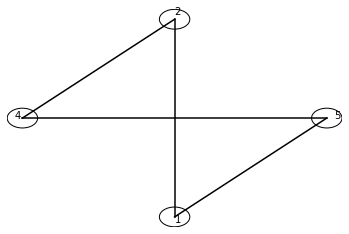

In [15]:
nodes = [5, 2, 4, 1]
connectivity = np.array([[0, 0, 1, 1], 
			 [0, 0, 1, 1], 
			 [1, 1, 0, 0], 
			 [1, 1, 0, 0]])

graph = Graph(nodes, connectivity)
graph.plot()

**Exercise** The image below show the various regions of Bristol. Create a network to represent the connectivity of the blue regions. Assume that regions are connected regions that they share a border with.  
<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/bristol_regions.png?raw=true" width="425"/> 

You should re-produce the image below if your code is correct:

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/network_plot2.png?raw=true" width="425"/> 

In [72]:
#Your code goes here

<h2> Searching with Breadth First Search </h2>

One type of problem that we can solve with search (but not a binary search tree) is finding the shorted path between two locations. For example, we can use a search algorithm to find the shortest path between any two regions in Bristol. The basic idea is to start at the origin location and then check whether any of its children are the destination- if they are, great, we've found the shortest path. If not, we then check the to see if any of its children's children are the destination. If not, we continue checking children's children's children and so on, until we find the destination. 

A similar approach can also be used to decide on the best move in deterministic games like chess or tic-tac-toe. To represent a game with a tree like this, we use the current state of the game as the root node in our tree. Each of our possible moves then represents the children of the root. For each of those children, we can then add further children representing a possible move by our opponent. We can then win the game by searching for a sequence of moves that leads to victory. 

We'll see how this works by writing some code to find the shortest path between Cotham and Westbury. We'll use the approach described above- checking the children of the start node, and then the children's children until we find the destination. This approach is known as *Breadth first search* as it explores the search tree by always checking the nodes closest (in the tree) to the starting node. To do this, we'll need to to keep track of which nodes we need to check next, and which nodes we've already visited. We can do this using a Queue. 

We start by adding our start node (Cotham) to the queue and initalising an empty list to represent the nodes we've already visited.

In [61]:
start_node = graph.nodes[0]
goal = graph.nodes[-1]
search_queue = Queue()
search_queue.push(start_node)
visited = []

We then enter the main body of the algorithm. We start by popping an element from our queue and checking whether it is the goal or not.

In [62]:
node_to_check = search_queue.pop()
print(node_to_check.value)

#If we are at the goal, then we are finished.
if node_to_check == goal:
	print("Done")

Cotham


As we're not at the goal, we need to add all the neighbours of the node we are checking to the queue, provided we haven't already visited them.

In [63]:
for neighbour_index in node_to_check.get_neighbours():
	#Get a node based on the index
	neighbour = graph.nodes[neighbour_index]
	#Check we haven't already visited the neighbour.
	if neighbour_index not in visited:
		#if not, add it to the search queue and store in visited.
		search_queue.push(neighbour)
		visited.append(neighbour_index)
		#Set the parent property to allow for backtracking.
		neighbour.parent = node_to_check

print("Search queue")
print([node.value for node in search_queue.queue])
print("Visited")
print([node for node in visited])

Search queue
['Cabot', 'Clifton East', 'Redland']
Visited
[1, 2, 7]


Next, we go back to the start of our algorithm body and pop the next item of our search queue.

In [64]:
node_to_check = search_queue.pop()
print(node_to_check.value)

#If we are at the goal, then we are finished.
if node_to_check == goal:
	print("Done")

Cabot


Again, this isn't our goal, so we need to add the neighbours of Cabot to our search queue.

In [65]:
for neighbour_index in node_to_check.get_neighbours():
	#Get a node based on the index
	neighbour = graph.nodes[neighbour_index]
	#Check we haven't already visited the neighbour.
	if neighbour_index not in visited:
		#if not, add it to the search queue and store in visited.
		search_queue.push(neighbour)
		visited.append(neighbour_index)
		#Set the parent property to allow for backtracking.
		neighbour.parent = node_to_check

print("Search queue")
print([node.value for node in search_queue.queue])
print("Visited")
print([node for node in visited])

Search queue
['Clifton East', 'Redland', 'Cotham', 'Clifton']
Visited
[1, 2, 7, 0, 3]


Repeating this process, we'll either find the goal or empty our queue (i.e. there's no path between the start and goal).

To achieve this, we simply put the main body of our algorithm into a loop as below.

In [68]:
while not search_queue.is_empty():
	#Pop the next node from the Queue
	node_to_check = search_queue.pop()

	#If we are at the goal, then we are finished.
	if node_to_check == goal:
		print("Goal found")
		break

	#If not, we need to add all the neighbours of the current node to the search queue. 
	#Start by looping through all the neighbours
	for neighbour_index in node_to_check.get_neighbours():
		#Get a node based on the index
		neighbour = graph.nodes[neighbour_index]
		#Check we haven't already visited the neighbour.
		if neighbour_index not in visited:
			#if not, add it to the search queue and store in visited.
			search_queue.push(neighbour)
			visited.append(neighbour_index)
			#Set the parent property to allow for backtracking.
			neighbour.parent = node_to_check

print("Search queue")
print([node.value for node in search_queue.queue])
print("Visited")
print([node for node in visited])

Goal found
Search queue
['Stoke Bishop']
Visited
[1, 2, 7, 0, 3, 5, 6, 8, 4]


Now that we've found the goal, we need to extract the path from start to goal. To help us do this, we've been setting the 'parent' attribute of each node. This attribute tells us where we should travel next if we want to go from goal to start (i.e. in the reverse direction).


In [70]:
for node in graph.nodes:
    print("Node %s has parent %s" % (node.value, node.parent.value))

Node Cotham has parent  Cabot
Node Cabot has parent  Cotham
Node Clifton East has parent  Cotham
Node Clifton has parent  Cabot
Node Stoke Bishop has parent  Clifton
Node Westbury has parent  Redland
Node Henleaze has parent  Redland
Node Redland has parent  Cotham
Node Bishopston has parent  Redland


To find the path, we start at the goal node, and then follow the sequence given by the parent attributes (i.e. we go goal, goal's parent, goal's parent's parent, and so on). The reverse of this sequence is our path.

**Exercise** Implement the function get_path() which takes a list of nodes as inputs (with parent attribute set) and returns the path. You should return the path as a list of node values- i.e something like ["Cabot", "Cotham", etc]. For bonus points, re-implement this as a method of the *Graph* class rather than as a standalone function.

In [71]:
def get_path(nodes):
    path = []
    #Your code goes here
    return path

path_to_westbury = get_path(graph.nodes)
print(path_to_westbury)

[]


<h2> Robotic path planning with Breadth-first-search</h2>

A similar approach can be used to plan a path through a cluttered environment or maze- such approaches are commonly used in robotics for path planning. To do this, we assume that our robot is confined to movement on a grid (i.e can only move up, down, left or right). We can then represent the maze with a 2D numpy array- we use zeros to represent spaces where the robot can move into, and ones to represent locations that are blocked. We can then use our BFS code from above, with one small change- we need to adapt our "get neighbours" function.

**Task 4**: Adapt the BFS code from above to allow you to find a path through a map with obstacles. We've provided you with three grids below.  You'll need to write some code for plotting the grids, and adapt the BFS code from above to work in this context. When run, your code should plot each of the three maps, displaying the route you've found on your plot. 

In [12]:
grids = {
    'small': np.zeros((10, 10)),
    'medium': np.zeros((20, 20)),
    'large': np.zeros((30, 30))
}

# Add obstacles to the grids
grids['small'][1:4, 2] = 1
grids['medium'][2:8, 4] = 1
grids['medium'][10:15, 10:15] = 1
grids['large'][3:12, 6] = 1
grids['large'][15:20, 15:20] = 1
grids['large'][25:28, 5:25] = 1

# Define the start and goal positions
starts = {
    'small': [0, 0],
    'medium': [0, 0],
    'large': [0, 0]
}
goals = {
    'small': [9, 9],
    'medium': [19, 19],
    'large': [29, 29]
}

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/robot_search_1.png?raw=true" width="300"/>  <img src="https://github.com/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/robot_search_2.png?raw=true" width="300"/><img src="https://github.com/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/robot_search_3.png?raw=true" width="300"/>

<h3> Speeding up our planner with heuristic search</h3>

While BFS is able to solve any grid which has a path between the start and the goal, it might take more time than is necessary. This is due to the way it explores the search tree, always checking first the node which is closest to the root of the search tree. An alternative to breadth-first-search is depth-first-search (DFS), in which we instead look at the node which is *furthest* from the root of the search tree. We can switch between breadth and depth first search just by changing our data structure from a queue (for BFS) to a stack (for DFS). 

**Exercise** Add some code to your solution for counting how many nodes of the graph are explored before a solution is found. Now change your BFS code into DFS (by using a stack instead of a queue). How does the number of nodes explored change as you swap between BFS and DFS?

Although BFS and DFS will both work for these sorts of problems, we can in general do better. The key idea is that rather than just relying on information about how close we are to the root node to order our search path, we can also use information about the distance from the goal. In the case of path planning, we can calculate the euclidean distance between a node and the goal, and explore nodes with a lower distance to the goal first.

We can do this by introducing a further Abstract Data type- the priority queue. A priority queue associates each element in the queue with a number. Elements are then removed in priority order- i.e highest priority first. 

**Task 5**: Extend your solution to task 3 to use a priority queue. You will need to first implement a class representing a priority queue. You have two choices for how you go about this- you can either modify the pop method, to first search for the highest priority item. Or, you can modify the push method to keep the queue sorted as new items are added. Once you've implemented your PriorityQueue class, you'll need to write a function to calculate the priority of each neighbour of a grid (by calculating the distance from a node to the goal), and then switch from a Queue to a PriorityQueue in your search algorithm. 

<h2> Solving Sudoku with Search</h2>

A similar approach can also be used to find solutions to the number game Sudoku. For those who aren't familiar, Sudoku is a number placement game. Given a grid (of any size, but we'll stick to 9x9), we have to place the numbers 1-9 such that each row, column and square contains the numbers 1-9. We can represent a Sudoku grid with a numpy array. To solve the grid, we need to think about how we can translate it into a search problem- unlike in the previous example, we won't be able to generate and store the entire network in advance (there are 6,670,903,752,021,072,936,960 possible sudoku grids- more than we can reasonably store in memory). Instead, we'll need to start with a single node (representing one configuration of the board) and expand the network as we go. 

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/consolidation_exercises/week_17_search/Sudoku.png?raw=true" width="425"/>

To get you started, we've provided some functions to help you out:

In [13]:
class SudokuGrid:

	def __init__(self, grid):
		self.grid = grid 
		self.n_rows = grid.shape[0]
		self.n_cols = grid.shape[1]
		self.n = int(np.sqrt(self.n_rows * self.n_cols))

	def __eq__(self, other):

		return np.all(self.grid == other.grid)

	def check_section(self, section):
		if len(set(section)) == len(section) and sum(section) == sum([i for i in range(self.n+1)]):
			return True
		return False

	def get_squares(self):

		grid_step = int(np.sqrt(self.n))
		#print(grid_step)

		squares = []

		for i in range(grid_step):
			for j in range(grid_step):
				row_min = i * grid_step
				row_max = (i+1) * grid_step
				col_min = j * grid_step
				col_max = (j+1) * grid_step

				square = self.grid[row_min:row_max, row_min:row_max] 
				squares.append(square.flatten())

		return(squares)

	def check_solution(self):
		'''
		This function is used to check whether a sudoku board has been correctly solved

		args: grid - representation of a suduko board as a nested list.
		returns: True (correct solution) or False (incorrect solution)
		'''

		for row in self.grid:
			if self.check_section(row) == False:
				return False

		for i in range(self.n_rows):
			column = []
			for row in self.grid:
				column.append(row[i])

			if self.check_section(column) == False:
				return False

		for square in self.get_squares():
			if self.check_section(square) == False:
				return False

		return True	


def solve(grid):

	#Your code goes here.

	return grid

The SudokuGrid class can be used to represent a possible solution to a Sudoku grid. You can check whether the grid is correct or not by using the check_solution() method, which will either return True (the board is a solution) or False (the board isn't a solution). 

**Task 6**: Implement a function for solving a Sudoku Grid using Breadth First Search. To adapt the BFS code from above, you'll need to think about how to adapt the steps for determing when you've reached the goal, and what it means to be a 'neighbour' of a grid. You can use the following grid to test your solution. When I run your code, it should print the solved grid to the terminal. Once you have BFS working, can you think of any heuristics you could use to speed up the search to allow your code to solve larger grids in a reasonable amount of time?

In [14]:
grid1 = np.array([[1, 2, 0, 4],
				[3, 0, 1, 2],
				[0, 0, 2, 1],
				[2, 0, 4, 3]])

grid2 = np.array([[0, 0, 0, 6, 0, 0, 0, 0, 0],
		[0, 0, 0, 0, 0, 0, 5, 0, 1],
		[3, 6, 9, 0, 8, 0, 4, 0, 0],
		[0, 0, 0, 0, 0, 6, 8, 0, 0],
		[0, 0, 0, 1, 3, 0, 0, 0, 9],
		[4, 0, 5, 0, 0, 9, 0, 0, 0],
		[0, 0, 0, 0, 0, 0, 3, 0, 0],
		[0, 0, 6, 0, 0, 7, 0, 0, 0],
		[1, 0, 0, 3, 4, 0, 0, 0, 0]])